<span style="font-size:32px; font-weight:bold; font-style:italic; color:#FF0000;">Using Linear Regression to predict the CO<sub>2</sub> emission of Cars</span>


In [1]:
import pandas as pd
import os
from io import StringIO
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

<hr style="border: 2px inset #48C9B0;">


In [2]:
#Opening the .csv file in such a way that it does not gives error that were face while using pandas

with open('Fuel Consumption Ratings 2023.csv', 'r', encoding='utf-8', errors='ignore') as file:
    text = file.read()

In [3]:
data_io = StringIO(text)

df = pd.read_csv(data_io)
df.head() # Pass the parameter created above to pandas dataframe

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        833 non-null    int64  
 1   Make                        833 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    int64  
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    int64  
 12  CO2 Emissions (g/km)        833 non-null    int64  
 13  CO2 Rating                  833 non

In [5]:
df.describe()

,Year,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.0,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2023.0,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,0.0,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,2023.0,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,2023.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


##### 1. The above data indicated that all the cars are of 2023 model
##### 2. The engine size varies from 1.2 L to 8 L.

# Explaining the Parameters

##### Model - Model of Cars

##### Transmission -A = automatic, AM = automated manual, AS = automatic with select shift, AV = continuously variable, M = manual

##### Fuel type - X = regular petrol, Z = premium petrol, D = diesel, E = ethanol (E85), N = natural gas


##### Fuel consumption - City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

##### CO2 rating - the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

##### Smog rating - the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

##### CO2 emissions - the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

<hr style="border: 2px outset #F1948A; margin-top: 10px;">

# EDA

## Relation between Engine size and CO<sub>2</sub> emissions

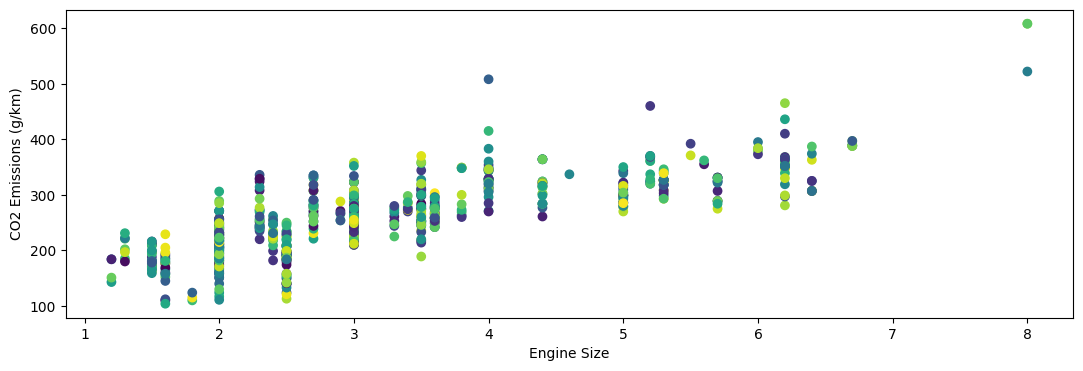

In [6]:
plt.rcParams['figure.figsize'] = (13, 4)
colors = np.random.rand(len(df['Engine Size (L)']))
plt.scatter(df['Engine Size (L)'], df['CO2 Emissions (g/km)'], c=colors)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

##### The above graph show a linear relation between engine size and co<sub>2</sub> emissions

## Relation between Smog rating and Engine Size.

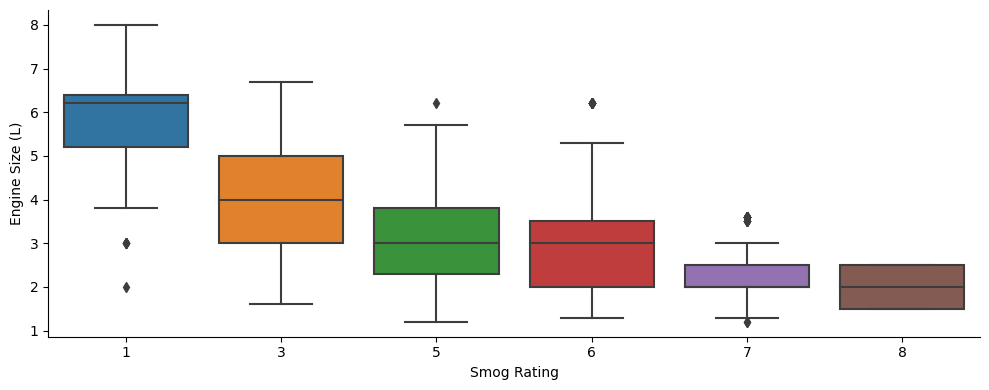

In [7]:
sns.catplot(data=df, y="Engine Size (L)", x="Smog Rating", kind="box", height=4, aspect=2.5)
plt.show()

##### Greater the Engine size Lower the smog rating

## Relation between Fuel cons.(L/100Km) and hwy(L/100km)<sub>[mileage] 

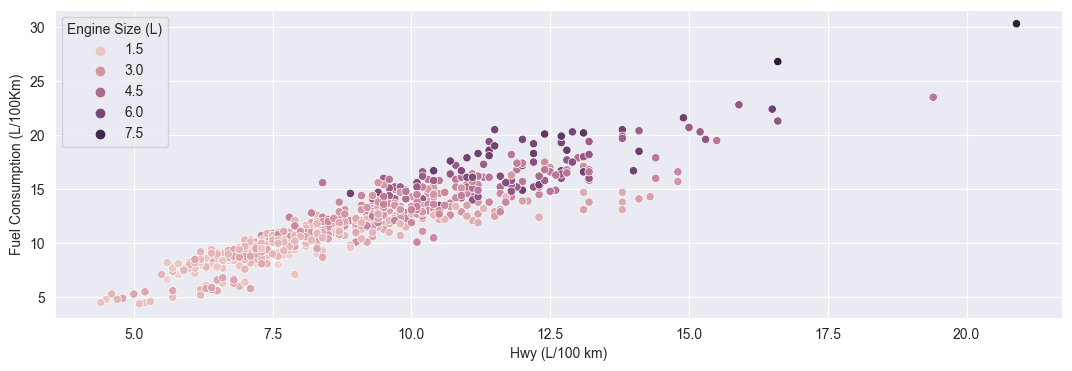

In [8]:
sns.set_style("darkgrid")
sns.scatterplot(data=df, y="Fuel Consumption (L/100Km)", x="Hwy (L/100 km)", hue="Engine Size (L)")
plt.show()

##### The above visualization clearly shows a linear relation between above two factors plus the gradient also indicated that the fuel consumption is low for smaller engine size.

In [9]:
# Importing necessary packages from sklearn for Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [10]:
# Taking the required data from dataset

X = df[["Engine Size (L)", "Cylinders", "Fuel Consumption (L/100Km)", "Hwy (L/100 km)"]]
y = df[["CO2 Emissions (g/km)"]]

In [11]:
# Splitting the data into three sets of Train (60%), Test and Cross Validation (20% each)

X_train, X_, y_train, y_ = train_test_split(X, y, test_size= 0.4, random_state=21)
X_test, Xcv, y_test, ycv = train_test_split(X_, y_, test_size= 0.5, random_state=21)

In [12]:
del X_, y_

In [13]:
# shape of Training set, testing set and Cross Val. set

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {Xcv.shape}")
print(f"the shape of the cross validation set (target) is: {ycv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (499, 4)
the shape of the training set (target) is: (499, 1)

the shape of the cross validation set (input) is: (167, 4)
the shape of the cross validation set (target) is: (167, 1)

the shape of the test set (input) is: (167, 4)
the shape of the test set (target) is: (167, 1)


<hr style="border: 2px outset #F1034F; margin-top: 10px;">

# Building a Linear Regression Model

### Training the Model

In [14]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)

# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE: {mean_squared_error(y_train, yhat) / 2}")

training MSE: 163.16626703250404


### Evaluating the Cross val. set

In [16]:
# Compute the mean and standard deviation of the training set then transform it
Xcv_scaled = scaler_linear.fit_transform(Xcv)

# Feed the scaled training set and get the predictions
yhat1 = linear_model.predict(Xcv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross val. MSE: {mean_squared_error(ycv, yhat1) / 2}")

Cross val. MSE: 145.26445438371508


### Evaluating the test set

In [17]:
# Compute the mean and standard deviation of the training set then transform it
XT_scaled = scaler_linear.fit_transform(X_test)

# Feed the scaled training set and get the predictions
yhat2 = linear_model.predict(XT_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"testing MSE: {mean_squared_error(y_test, yhat2) / 2}")

testing MSE: 103.95334012036088


### Calculating the  $R^2$ value for Cross val. and Test Set

In [18]:
from sklearn.metrics import r2_score
r2cv = r2_score(ycv, yhat1)
r2test = r2_score(y_test, yhat2)

print(f"r2 for Cross val. set : {r2cv:.2f}")
print(f"r2 for Test. set : {r2test:.3f}")

r2 for Cross val. set : 0.92
r2 for Test. set : 0.958


In [19]:
def plot_train_cv_test(yhat, y_train, yhat1, ycv, yhat2, y_test, title):
    plt.scatter(yhat, y_train, marker='x', c='r', label='training'); 
    plt.scatter(yhat1, ycv, marker='o', c='b', label='cross validation'); 
    plt.scatter(yhat2, y_test, marker='^', c='g', label='test'); 
    plt.title("input vs. target")
    plt.xlabel("Prediction");
    plt.ylabel("Actual"); 
    plt.legend()
    plt.show()


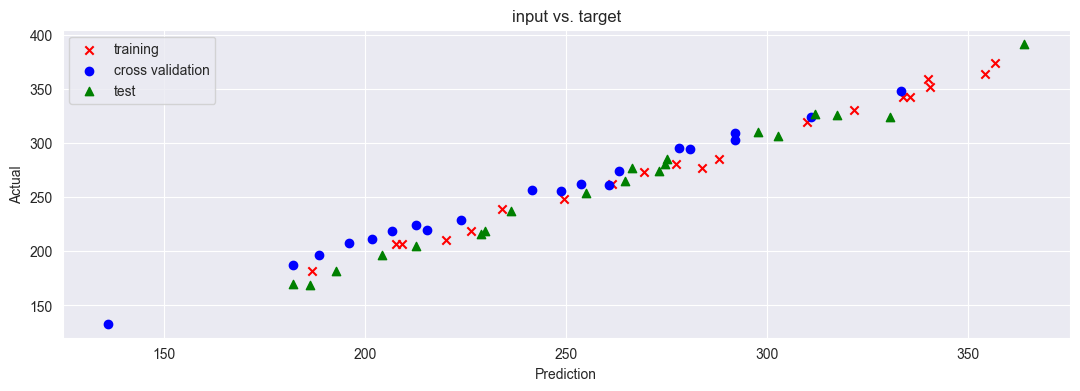

In [20]:
plot_train_cv_test(yhat[:20], y_train[:20], yhat1[:20], ycv[:20], yhat2[:20], y_test[:20], title='title')

In [21]:
import joblib

# Save the trained model to a file
joblib.dump(linear_model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']